In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def potf(x):
    return 0*x

def potpot_indiv(x):
    if x <= 0 or x >= 1:
        return np.inf
    else:
        return 0.
    
def potpot(x):
    return np.vectorize(potpot_indiv)(x)

def potq(x):
    return 10*x**2/2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [17]:
def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

def plot_sim(x):
    msd = np.average(x**2,axis=1)
    fig,ax = plt.subplots(2,1)
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    return plt.gcf()

/tmp/ipykernel_1600579/3199356629.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_sim(x).show()


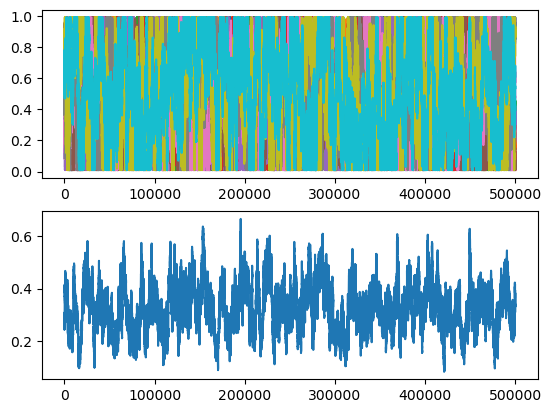

In [22]:
x = do_sim(500000,10,potpot, xinit=0.5)
plot_sim(x).show()

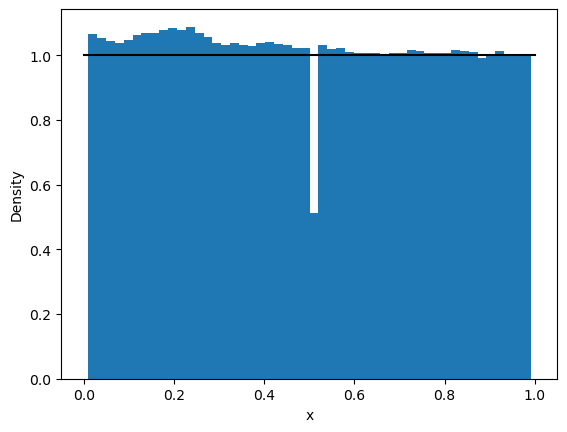

In [24]:
hist, bins = np.histogram(x.ravel(), bins=50, density=True)
plt.bar(bins[:-1], hist, align="edge", width=1/len(hist))
plt.plot([0,1], [1,1], color="black")
plt.xlabel("x")
plt.ylabel("Density")
# plt.savefig("../figures/02 potential well.pdf")
plt.show()

In [30]:
range(x.shape[1])

range(0, 10)

In [31]:
x.T

array([[0.5 , 0.49, 0.5 , ..., 0.9 , 0.89, 0.9 ],
       [0.5 , 0.51, 0.5 , ..., 0.15, 0.16, 0.17],
       [0.5 , 0.51, 0.52, ..., 0.41, 0.42, 0.41],
       ...,
       [0.5 , 0.49, 0.5 , ..., 0.9 , 0.91, 0.9 ],
       [0.5 , 0.49, 0.5 , ..., 0.91, 0.92, 0.91],
       [0.5 , 0.51, 0.52, ..., 0.63, 0.62, 0.61]])

In [29]:
np.histogram2d(range(x.shape[1]), x.T)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 10) + inhomogeneous part.